# Electricity consumption UK EDA

Group: 
- Zihang WANG
- Liyang FANG
- Sanjaya deshapriya gunawardena Heeralu aarachchige don


In [1]:
%load_ext lab_black

## Data exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("DataSet/historic_demand_2009_2024.csv")

### General Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268432 entries, 0 to 268431
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   settlement_date            268432 non-null  object
 1   settlement_period          268432 non-null  int64 
 2   period_hour                268432 non-null  object
 3   nd                         268432 non-null  int64 
 4   tsd                        268432 non-null  int64 
 5   england_wales_demand       268432 non-null  int64 
 6   embedded_wind_generation   268432 non-null  int64 
 7   embedded_wind_capacity     268432 non-null  int64 
 8   embedded_solar_generation  268432 non-null  int64 
 9   embedded_solar_capacity    268432 non-null  int64 
 10  non_bm_stor                268432 non-null  int64 
 11  pump_storage_pumping       268432 non-null  int64 
 12  ifa_flow                   268432 non-null  int64 
 13  ifa2_flow                  268432 non-null  

In [4]:
df.head(5)

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
settlement_period,268432.0,24.497258,13.851973,1.0,12.0,24.0,36.00,48.0
nd,268432.0,31432.883837,7802.556031,13367.0,25187.0,30796.0,37148.25,59095.0
tsd,268432.0,32916.801387,7577.686611,16513.0,26868.0,32067.0,38334.00,60147.0
england_wales_demand,268432.0,28606.102149,7069.481427,0.0,22923.0,28021.0,33827.00,53325.0
embedded_wind_generation,268432.0,1258.255223,959.750387,0.0,543.0,1005.0,1711.00,5587.0
embedded_wind_capacity,268432.0,4373.583023,1946.873188,1403.0,2092.0,4403.0,6504.00,6574.0
embedded_solar_generation,268432.0,842.277210,1652.485432,0.0,0.0,0.0,823.00,10329.0
embedded_solar_capacity,268432.0,8364.234178,5708.173870,0.0,1987.0,11433.0,13080.00,15954.0
non_bm_stor,268432.0,6.918825,39.905131,-24.0,0.0,0.0,0.00,893.0
pump_storage_pumping,268432.0,309.980245,534.462886,0.0,8.0,11.0,390.00,2019.0


### Missing data

In [6]:
df.isna().sum()

settlement_date              0
settlement_period            0
period_hour                  0
nd                           0
tsd                          0
england_wales_demand         0
embedded_wind_generation     0
embedded_wind_capacity       0
embedded_solar_generation    0
embedded_solar_capacity      0
non_bm_stor                  0
pump_storage_pumping         0
ifa_flow                     0
ifa2_flow                    0
britned_flow                 0
moyle_flow                   0
east_west_flow               0
nemo_flow                    0
is_holiday                   0
dtype: int64

### Duplicated data

In [7]:
df.duplicated().sum()

0

## Conclusion--1

From the Previous analysis, it is not hard to find that the dataset itself is clean enough so there is no need for us to pay attention to do the data cleaning step. In the next section, we will determine what kind of data will be used for the visulization and modeling task. The baseline for the consideration is that the selected feature should be relevant to time.

## Data Preparation

In [8]:
df["settlement_date"] = pd.to_datetime(df["settlement_date"])
df = df.set_index("settlement_date")

In [9]:
df = df[df.index > "2021-01-01"]
df["day_of_month"] = df.index.day
df["day_of_week"] = df.index.day_of_week
df["day_of_year"] = df.index.day_of_year
df["quarter"] = df.index.quarter
df["month"] = df.index.month
df["year"] = df.index.year
df["week_of_year"] = df.index.isocalendar().week.astype("int64")

In [10]:
selected_columns = [
    "day_of_month",
    "day_of_week",
    "day_of_year",
    "quarter",
    "month",
    "year",
    "week_of_year",
    "period_hour",
    "is_holiday",
    "tsd",
]
df = df[selected_columns]

In [11]:
df.head()

,day_of_month,day_of_week,day_of_year,quarter,month,year,week_of_year,period_hour,is_holiday,tsd
settlement_date,,,,,,,,,,
2021-01-01 00:30:00,1,4,1,1,1,2021,53,0:30:00,1,29114
2021-01-01 01:00:00,1,4,1,1,1,2021,53,1:00:00,1,28376
2021-01-01 01:30:00,1,4,1,1,1,2021,53,1:30:00,1,27749
2021-01-01 02:00:00,1,4,1,1,1,2021,53,2:00:00,1,27178
2021-01-01 02:30:00,1,4,1,1,1,2021,53,2:30:00,1,26798


## Conclusion -- 2

In this section, we only keep the predicted feature (std) and extend time features for the next visulization and modeling session. To decrease the data size we start from 2021.

## Data Visulization

Text(0.5, 1.0, 'Distribution of electricity consumption')

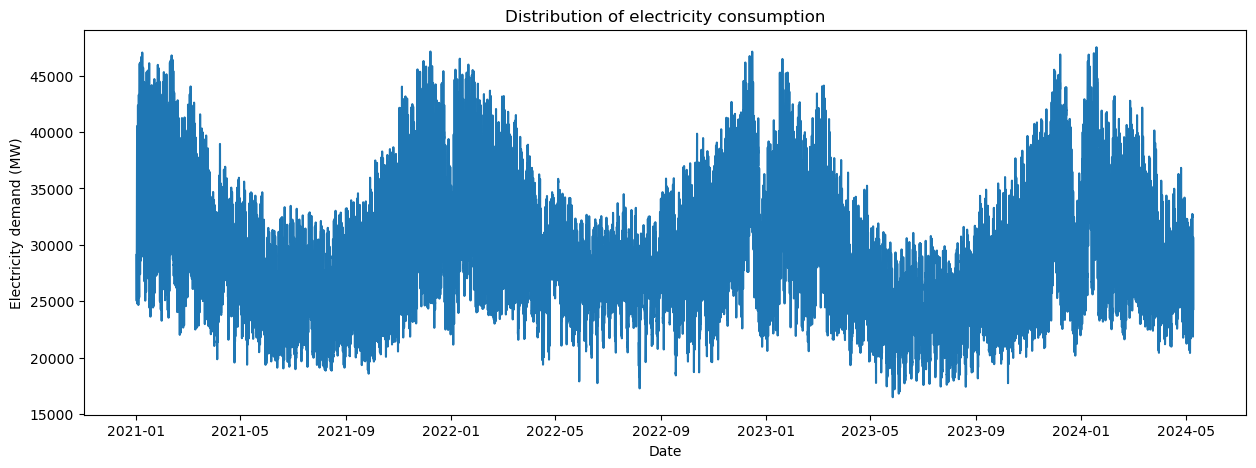

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df.index, df["tsd"])
ax.set_xlabel("Date")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Distribution of electricity consumption")

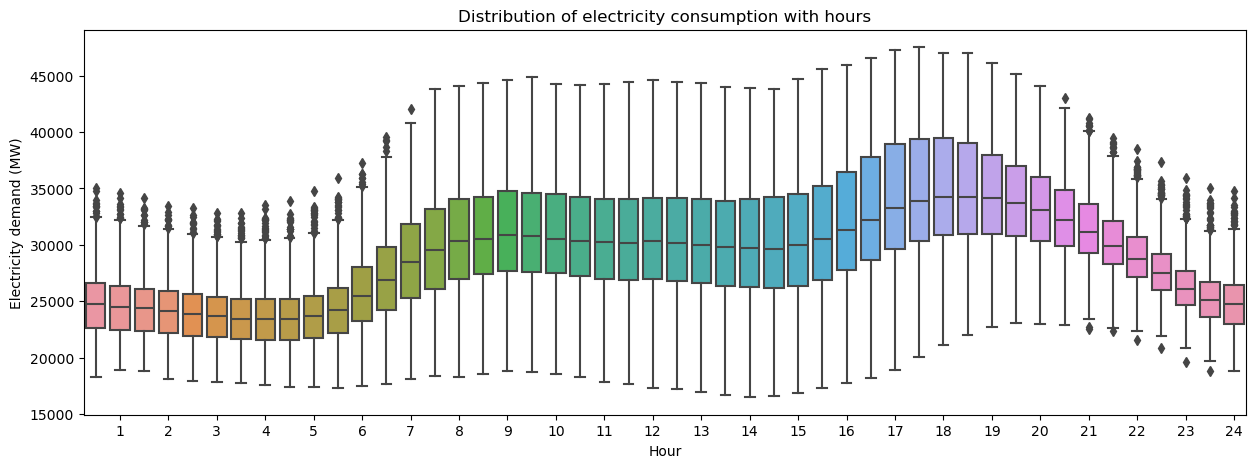

In [13]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="period_hour", y="tsd", data=df)
# Reduce the frequency of the xticks and change the labels to be in
# the range [0,24] hours
ax.set_xticks(range(1, 49, 2))
ax.set_xticklabels(range(1, 25))
ax.set_xlabel("Hour")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Distribution of electricity consumption with hours")
plt.show()

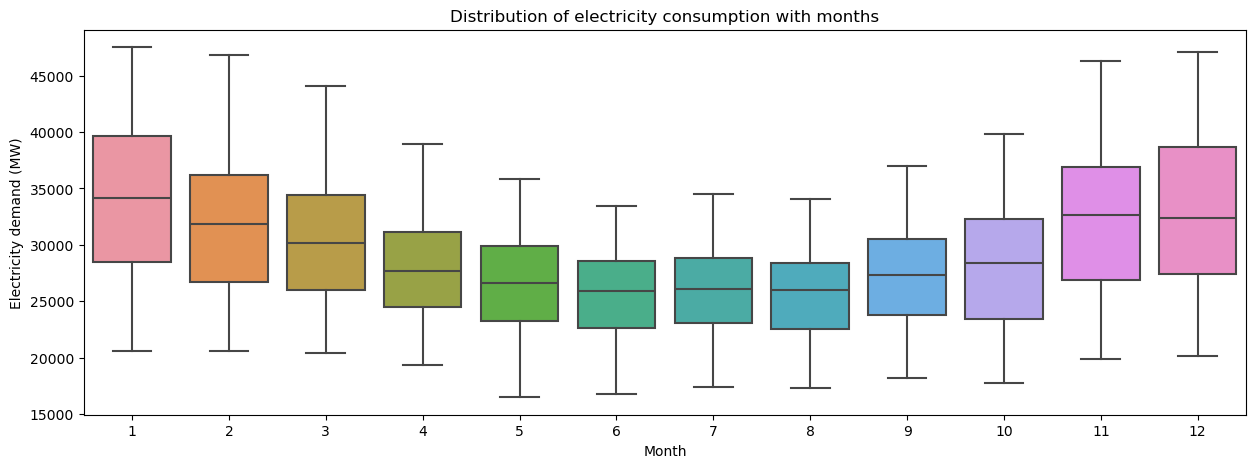

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="month", y="tsd", data=df)

ax.set_xlabel("Month")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Distribution of electricity consumption with months")
plt.show()

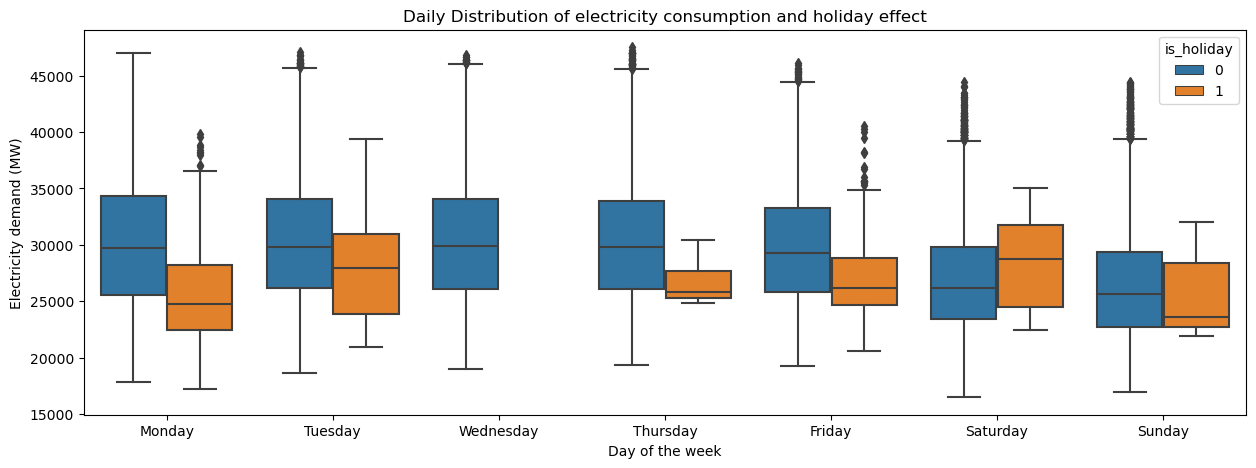

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="day_of_week", y="tsd", data=df, hue="is_holiday", ax=ax)

ax.set_xticklabels(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
ax.set_xlabel("Day of the week")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Daily Distribution of electricity consumption and holiday effect")
plt.show()

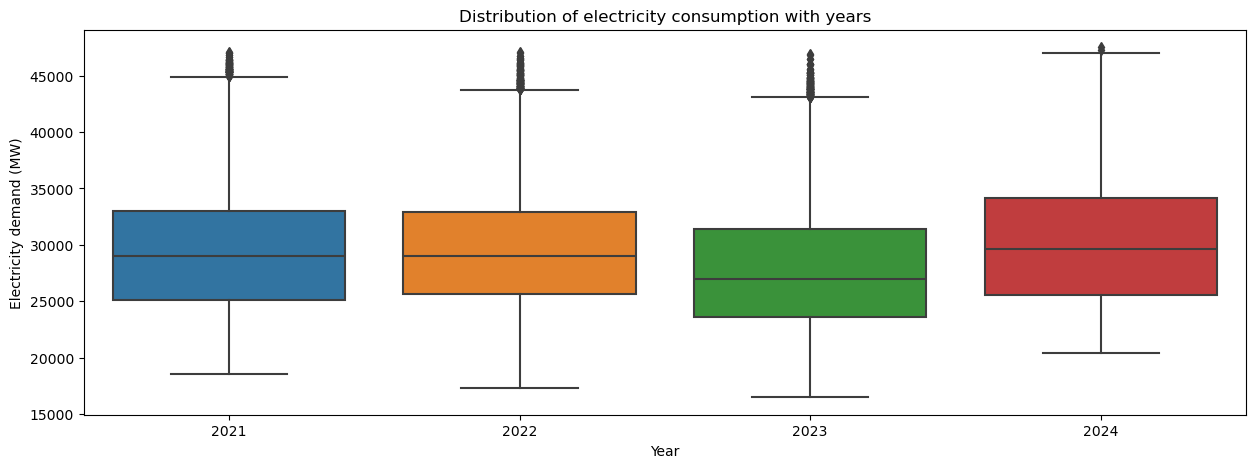

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="year", y="tsd", data=df)

ax.set_xlabel("Year")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Distribution of electricity consumption with years")
plt.show()

## Conclusion -- 3

From the previous visulizations, we can get these observations:
* The distribution of TSD has an obvious seasonality
* The electricity consumption is mainly in the day
* There is lower consumption in summer
*  Workday has higher consumption than holiday if not bank holiday
*  There isn't a clear trend over years 

## Anomalities Analysis

In [17]:
# Set the rolling window size to one day (48 periods) or one week (336 periods)
window_size = 48

# Calculate rolling mean and standard deviation
df["rolling_mean"] = df["tsd"].rolling(window=window_size).mean()
df["rolling_std"] = df["tsd"].rolling(window=window_size).std()

# Detect anomalies where the value is more than 3 standard deviations away from the rolling mean
df["anomaly"] = (df["tsd"] > df["rolling_mean"] + 3 * df["rolling_std"]) | (
    df["tsd"] < df["rolling_mean"] - 3 * df["rolling_std"]
)

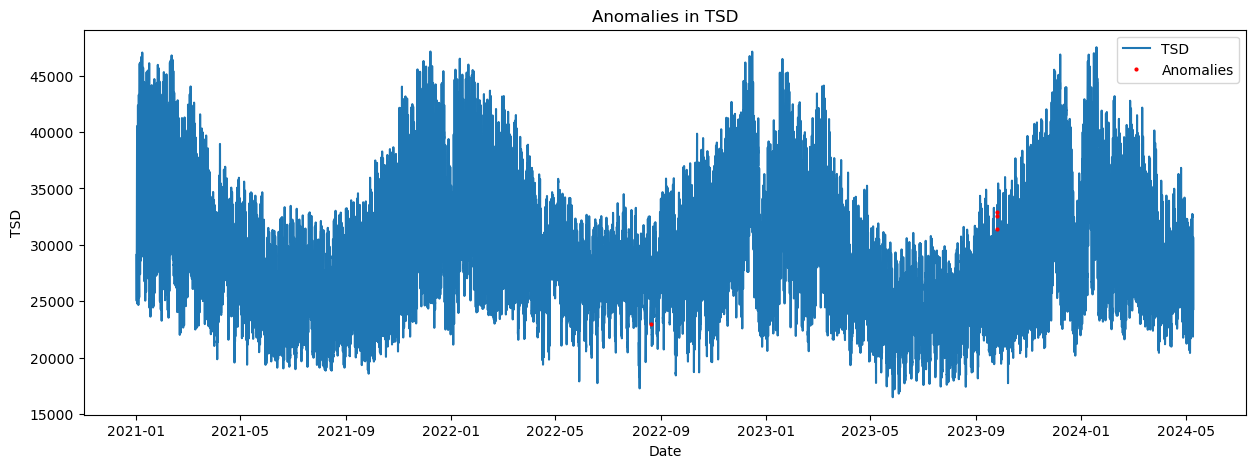

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(df["tsd"], label="TSD")
plt.plot(df[df["anomaly"]]["tsd"], "ro", markersize=2, label="Anomalies")
plt.title("Anomalies in TSD")
plt.xlabel("Date")
plt.ylabel("TSD")
plt.legend()
plt.show()

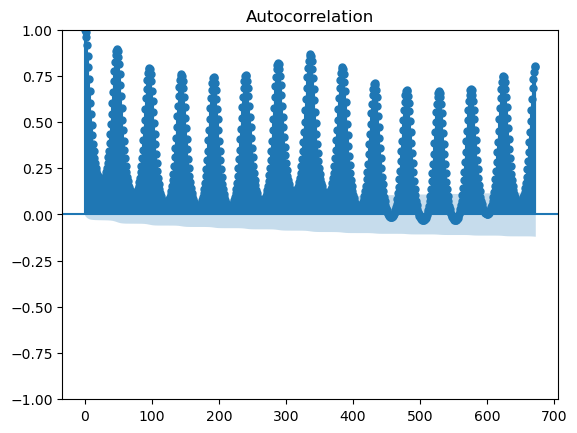

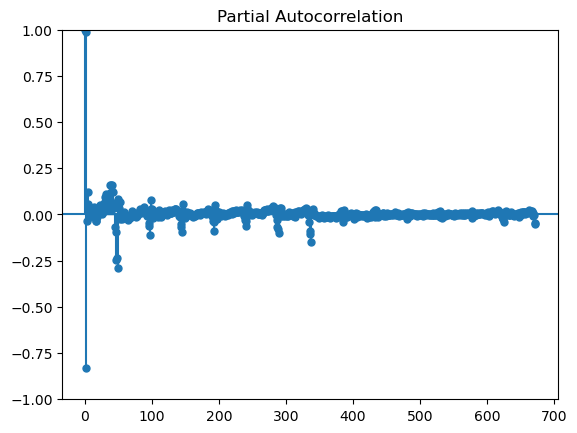

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df["tsd"], lags=672)
plt.show()

plot_pacf(df["tsd"], lags=672)
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["tsd"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -10.989031139733033
p-value: 7.137103387777387e-20


## Conclusion -- 4

* The ACF plot reveals strong seasonality or cyclicality in the data, with persistent autocorrelations.
* The PACF plot suggests an autoregressive component (AR) and potential seasonal influences.